## Modelos de Machine Learning para forecast de Generación de Energía Eléctrica en SEN
Lectura del dataset


In [1]:
import pandas as pd

link = (r"C:\Users\migue\Desktop\Proyecto BEDU\Generacion_Bruta_SIE.csv")
df = pd.read_csv(link)

df = pd.DataFrame(df)

df = df.drop(columns = ['bcs', 'sin'])

In [2]:
df = df.set_index(pd.DatetimeIndex(df['fecha'].values))
df = df.drop(['fecha'], axis = 1)
df.head()

,bca
2010-01-01,873193.999
2010-02-01,793243.355
2010-03-01,871591.088
2010-04-01,785727.001
2010-05-01,870490.271


Importamos librerías necesarias

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

Crear una columna de predición y separa el DataFrame en conjunto de entrada y salida

In [4]:
lag = 1
df = df[['future_generation_forecast']] = df[['bca']].shift(-lag)
df.head(10)


,bca,future_generation_forecast
2010-01-01,793243.355,793243.355
2010-02-01,871591.088,871591.088
2010-03-01,785727.001,785727.001
2010-04-01,870490.271,870490.271
2010-05-01,1018504.823,1018504.823
2010-06-01,1210946.175,1210946.175
2010-07-01,1214077.891,1214077.891
2010-08-01,1084907.635,1084907.635
2010-09-01,940333.298,940333.298
2010-10-01,865317.360,865317.360


In [5]:
# Conjunto de entrada
import numpy as np
x = np.array(df[['bca']])
x = x[:df.shape[0] - lag]
print(x[0:6])

[[ 793243.355]
 [ 871591.088]
 [ 785727.001]
 [ 870490.271]
 [1018504.823]
 [1210946.175]]


In [6]:
# Conjunto de salida
y = np.array(df[['future_generation_forecast']])
y = y[:-lag].ravel()
print(y[0:6])

[ 793243.355  871591.088  785727.001  870490.271 1018504.823 1210946.175]


Separamos nuestros datos en subconjuntos de entrenamiento y prueba

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, shuffle = False, random_state=100)

Generación del modelo, entrenamiento y predicción


In [8]:
svr = SVR(kernel = 'rbf', C = 1e9, gamma = 0.0000001)
rf = RandomForestRegressor(n_estimators=50)

svr.fit(x_train, y_train)
rf.fit(x_train, y_train)

y_pred_svr = svr.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [12]:
print('RESULTADOS SVM')
print('R2 en el conjunto de entrenamiento: ', svr.score(x_train, y_train))
print('R2 en el conjunto de prueba: ', svr.score(x_test, y_test))

print('RESULTADOS RANDOM FOREST')
print('R2 en el conjunto de entrenamiento: ', rf.score(x_train, y_train))
print('R2 en el conjunto de prueba: ', rf.score(x_test, y_test))

RESULTADOS SVM
R2 en el conjunto de entrenamiento:  0.9999999992957046
R2 en el conjunto de prueba:  0.9501762883777777
RESULTADOS RANDOM FOREST
R2 en el conjunto de entrenamiento:  0.9997609844651429
R2 en el conjunto de prueba:  0.9995989228652493


Por último graficamos los resultados

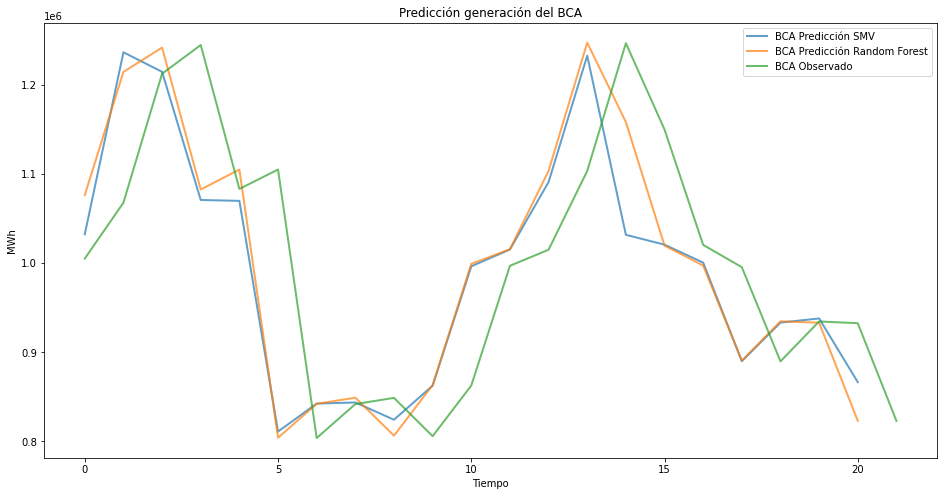

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,8))
plt.plot(np.delete(y_pred_svr, [n for n in range(0,lag)]), label = 'BCA Predicción SMV', lw = 2, alpha = 0.7)
plt.plot(np.delete(y_pred_rf, [n for n in range(0,lag)]), label = 'BCA Predicción Random Forest', lw = 2, alpha = 0.7)
plt.plot(y_test, label = 'BCA Observado', lw = 2, alpha = 0.7)
plt.ylabel('MWh')
plt.title('Predicción generación del BCA')
plt.xlabel('Tiempo')
plt.legend()
plt.show()